In [1]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Agregamos la variable de respuesta
df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [3]:
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [6]:
# MinMaxScaler: toma el rango total y lo comprime a un rango entre 0 a 1
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_2 = DecisionTreeRegressor(max_depth=2)

In [10]:
reg = tree_2.fit(X_train,y_train.reshape(-1))
y_train_hat = tree_2.predict(X_train)
y_test_hat = tree_2.predict(X_test)

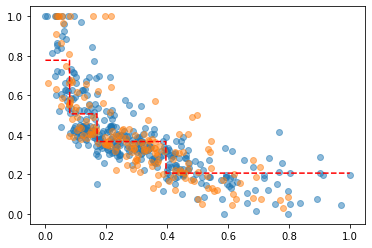

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(X_train,y_train,alpha=0.5)
plt.scatter(X_test,y_test,alpha=0.5)

X_plot = np.linspace(0,1,1000).reshape(-1,1)
y_plot = tree_2.predict(X_plot)

plt.plot(X_plot, y_plot,"r--");


In [12]:
from sklearn.tree import export_graphviz
print(export_graphviz(tree_2))

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.169\nmse = 0.039\nsamples = 339\nvalue = 0.391"] ;
1 [label="X[0] <= 0.08\nmse = 0.037\nsamples = 110\nvalue = 0.583"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 0.03\nsamples = 31\nvalue = 0.777"] ;
1 -> 2 ;
3 [label="mse = 0.019\nsamples = 79\nvalue = 0.506"] ;
1 -> 3 ;
4 [label="X[0] <= 0.396\nmse = 0.014\nsamples = 229\nvalue = 0.298"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="mse = 0.007\nsamples = 132\nvalue = 0.366"] ;
4 -> 5 ;
6 [label="mse = 0.008\nsamples = 97\nvalue = 0.206"] ;
4 -> 6 ;
}


In [13]:
from sklearn.metrics import r2_score
# Calculamos el error
print("Train", r2_score(y_train, y_train_hat))
print("Test", r2_score(y_test, y_test_hat))

Train 0.686183783521107
Test 0.5894049706991193


In [14]:
tree_5 = DecisionTreeRegressor(max_depth=5)


reg = tree_5.fit(X_train,y_train.reshape(-1))

y_train_hat = tree_5.predict(X_train)
y_test_hat = tree_5.predict(X_test)

Train 0.7904544931651996
Test 0.5972431490552768


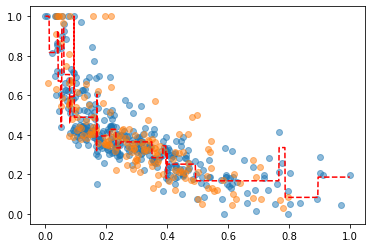

In [15]:
plt.scatter(X_train, y_train,alpha=0.5)
plt.scatter(X_test, y_test,alpha=0.5)

X_plot = np.linspace(0,1,1000).reshape(-1, 1)
y_plot = tree_5.predict(X_plot)

plt.plot(X_plot, y_plot,"r--")

print("Train", r2_score(y_train, y_train_hat))
print("Test", r2_score(y_test, y_test_hat))